# Machine Learning

The information about the features can be found here: https://www.kaggle.com/competitions/spaceship-titanic/data


<h2>Import Packages</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

<ipython-input-2-465e88a9d13b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
data = pd.read_csv('spaceship_titanic.csv')

In [4]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
data[data.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [8]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


In [9]:
data[data["CryoSleep"].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True


<h2>Data Visualization</h2>

<ipython-input-10-9fa67090a602>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


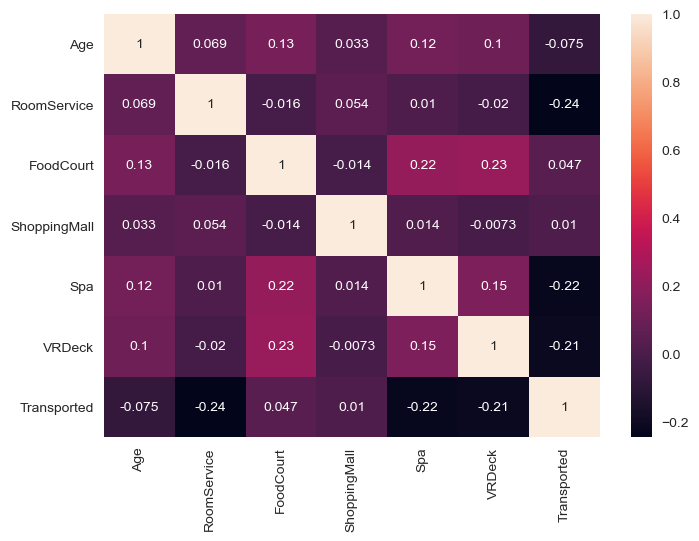

In [10]:
sns.heatmap(data.corr(), annot=True)
plt.show()

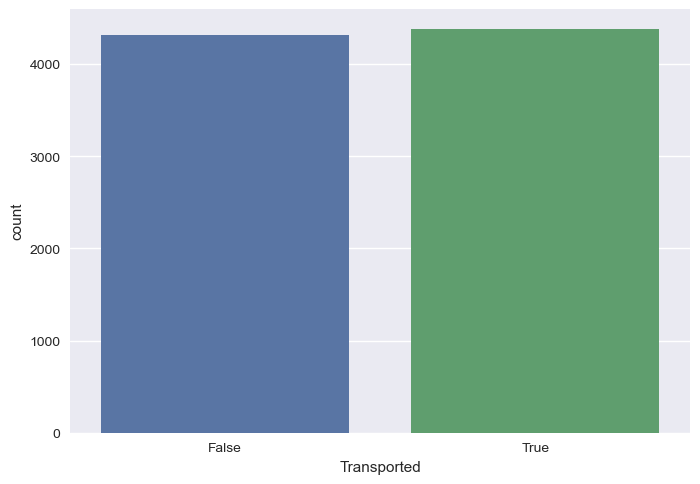

In [11]:
sns.countplot(data=data, x="Transported")
plt.show()

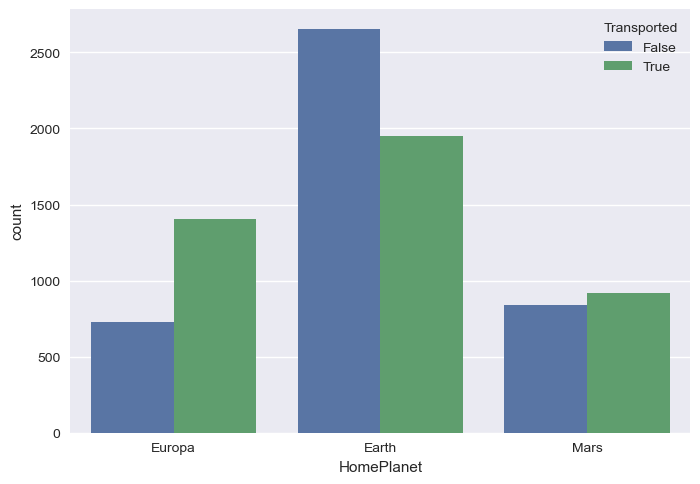

In [12]:
sns.countplot(data=data, x="HomePlanet", hue="Transported")
plt.show()

In [13]:
data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

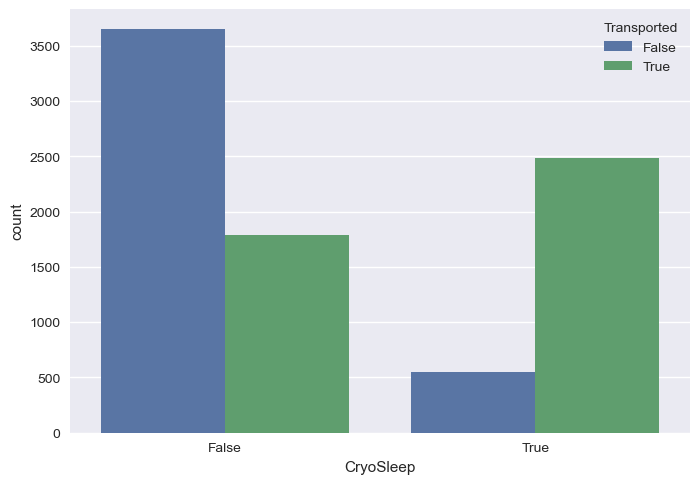

In [14]:
sns.countplot(data=data, x="CryoSleep", hue="Transported")
plt.show()

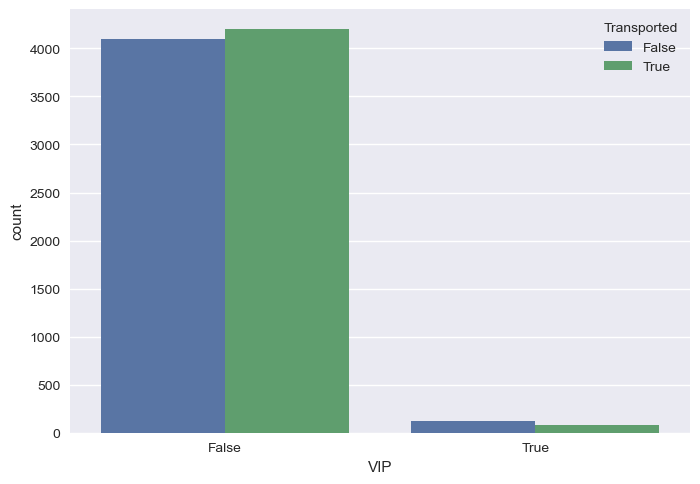

In [15]:
sns.countplot(data=data, x="VIP", hue="Transported")
plt.show()

In [16]:
data[["VIP", "Transported"]].value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
dtype: int64

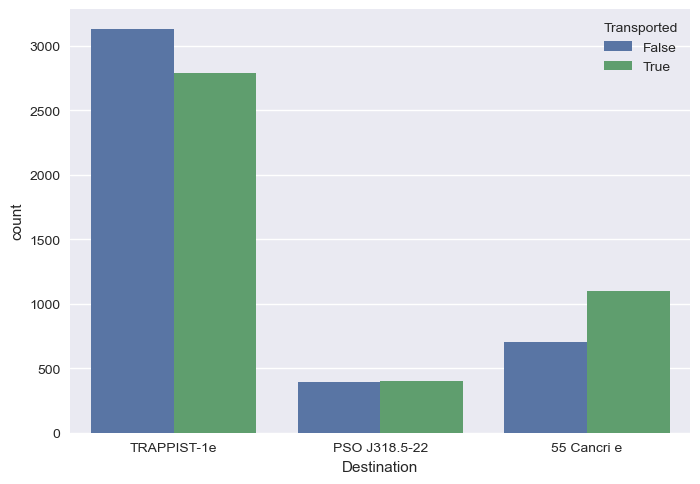

In [17]:
sns.countplot(data=data, x="Destination", hue="Transported")
plt.show()

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


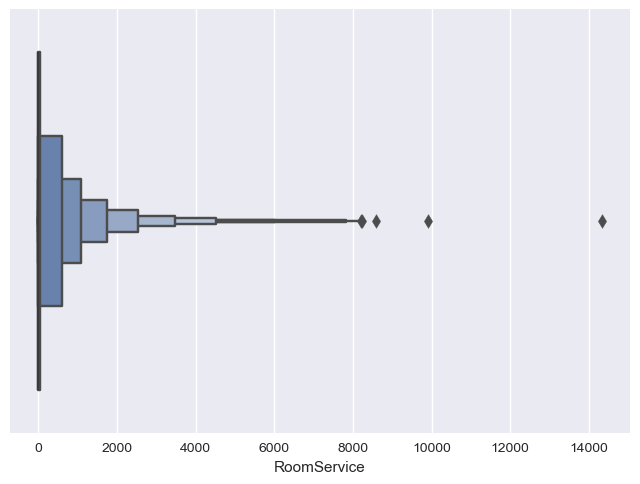

In [18]:
sns.boxenplot(data["RoomService"])
plt.show()

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


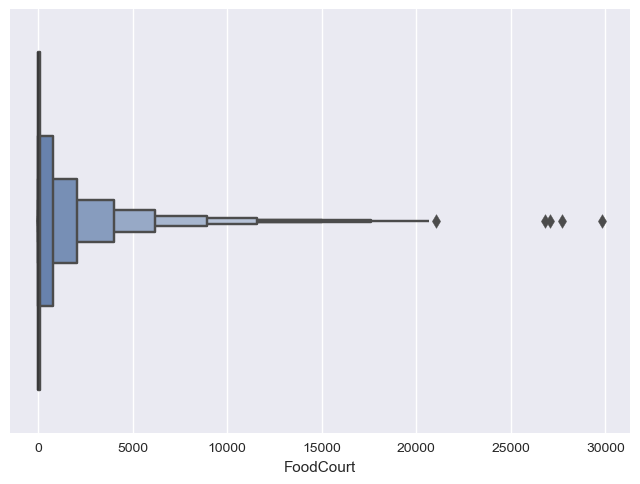

In [19]:
sns.boxenplot(data["FoodCourt"])
plt.show()

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


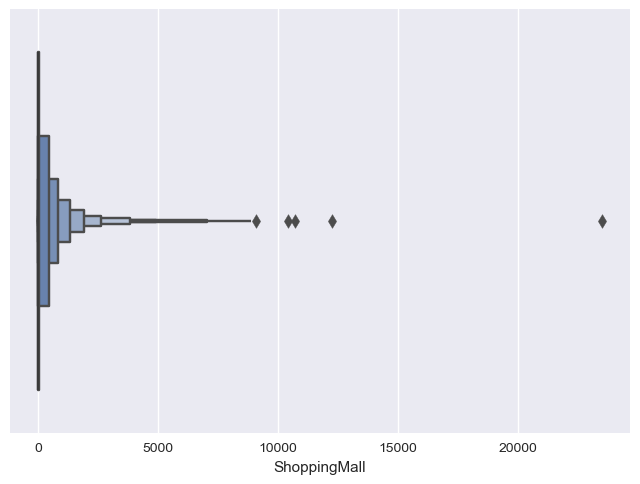

In [20]:
sns.boxenplot(data["ShoppingMall"])
plt.show()

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


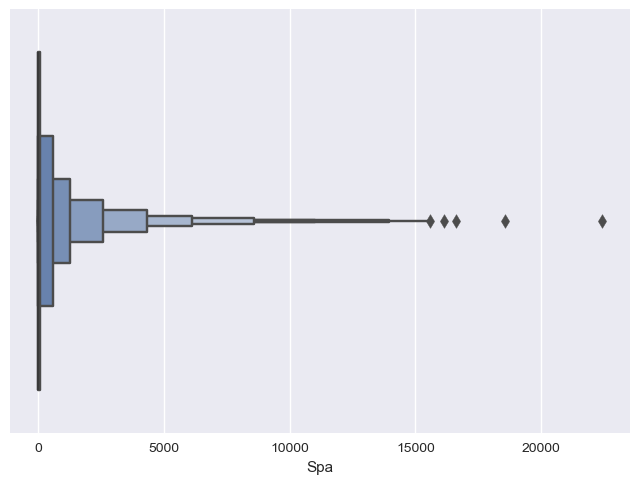

In [21]:
sns.boxenplot(data["Spa"])
plt.show()

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


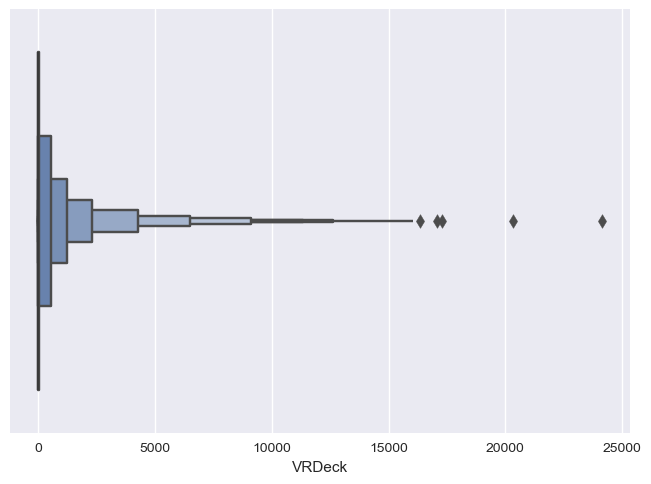

In [22]:
sns.boxenplot(data["VRDeck"])
plt.show()

<h2>Data Manipulation</h2>

In [23]:
df = data.copy()

In [24]:
cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

Looking at the descriptive analysis of df, 50 percentile for spending in each category is 0. There is a reasonsable plausability that the spending for rows with missing values to be 0 given the median value of 0, and the fact that there is missing data could suggest that passenger did not spend in the category at all which possibly led to the missing record when tabulating amount spent.

In [25]:
df[cols] = df[cols].fillna(0)

In [26]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [27]:
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False
47,0045_02,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,0.0,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [28]:
df[["RoomDeck", "RoomNum", "RoomSide"]] = df["Cabin"].str.split('/', expand=True)

Columns like `PassengerId`, `Cabin` and `Name` are irrelevant in determining `Transported` since they are likely independent. 

In [29]:
df.drop(['PassengerId', 'Cabin', 'Name', 'RoomNum'], axis=1, inplace=True)

In [30]:
df.dropna(inplace=True)

In [31]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomDeck,RoomSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S


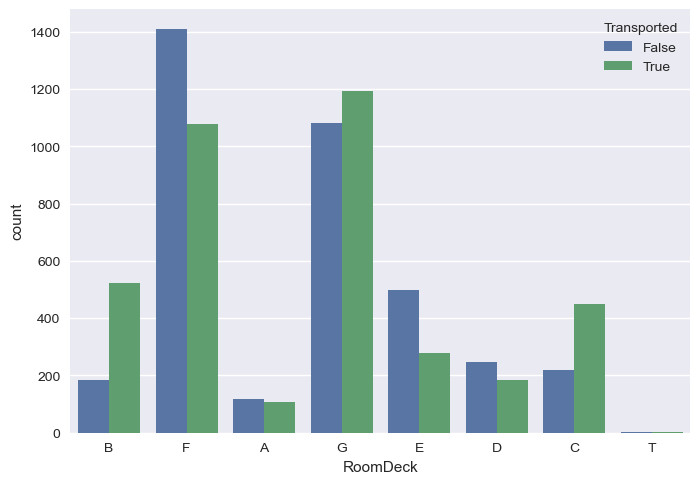

In [32]:
sns.countplot(x=df["RoomDeck"], hue=df["Transported"])
plt.show()

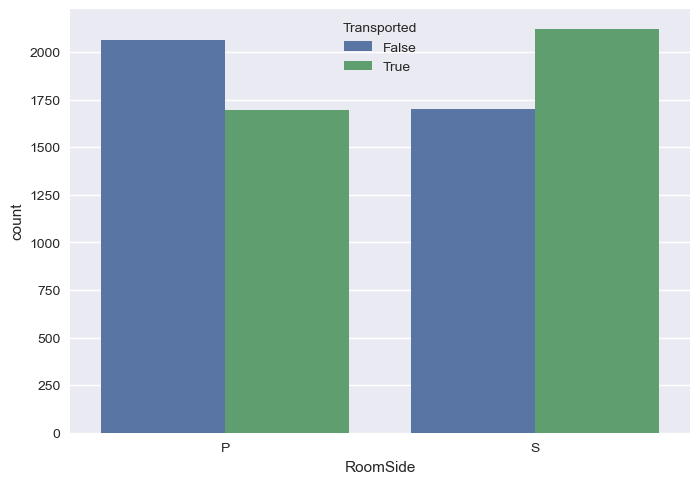

In [33]:
sns.countplot(x=df["RoomSide"], hue=df["Transported"])
plt.show()

<h2>Feature Engineering</h2>

In [34]:
X = pd.get_dummies(df.drop(['Transported'], axis=1), drop_first=True)

In [35]:
y = df['Transported']

In [36]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,RoomDeck_B,RoomDeck_C,RoomDeck_D,RoomDeck_E,RoomDeck_F,RoomDeck_G,RoomDeck_T,RoomSide_S
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


<h2>Setting up results tabulation</h2>

In [37]:
model_results = pd.DataFrame()

<h2>Scaling, Train | Test Split</h2>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5679, 20), (1893, 20), (5679,), (1893,))

In [41]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<h2>Multi-Class Logistic Regression Model</h2>

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [43]:
log_model = LogisticRegression(solver='saga',multi_class="auto",max_iter=5000)

In [44]:
C = np.logspace(0, 3, 8)
C

array([   1.        ,    2.6826958 ,    7.19685673,   19.30697729,
         51.79474679,  138.94954944,  372.75937203, 1000.        ])

In [45]:
penalty = ['l1', 'l2', 'elasticnet']

In [46]:
grid_log_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [47]:
grid_log_model.fit(scaled_X_train,y_train)

C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    ret

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([   1.        ,    2.6826958 ,    7.19685673,   19.30697729,
         51.79474679,  138.94954944,  372.75937203, 1000.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [48]:
grid_log_model.best_params_

{'C': 2.6826957952797255, 'penalty': 'l2'}

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, f1_score

In [50]:
y_pred = grid_log_model.predict(scaled_X_test)

In [51]:
logreg_accuracy_score = accuracy_score(y_test,y_pred)
logreg_accuracy_score

0.7939778129952456

In [52]:
logreg_precision_score = precision_score(y_test,y_pred, average='macro')
logreg_precision_score

0.7942532367482014

In [53]:
logreg_f1_score = f1_score(y_test,y_pred, average='macro')
logreg_f1_score

0.7939708561426696

In [54]:
confusion_matrix(y_test,y_pred)

array([[757, 215],
       [175, 746]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.78      0.80       972
        True       0.78      0.81      0.79       921

    accuracy                           0.79      1893
   macro avg       0.79      0.79      0.79      1893
weighted avg       0.79      0.79      0.79      1893



In [56]:
model_results = model_results.append({'Model': 'Logistic Regression', 'Accuracy':logreg_accuracy_score, 'Precision':logreg_precision_score,
                                     'f1_score': logreg_f1_score}, ignore_index=True)

<ipython-input-56-d110c0eca10d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Logistic Regression', 'Accuracy':logreg_accuracy_score, 'Precision':logreg_precision_score,


In [57]:
model_results

,Model,Accuracy,Precision,f1_score
0,Logistic Regression,0.793978,0.794253,0.793971


<h2>Random Forest Classification</h2>

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
int(np.sqrt(len(X.columns)))   # Using square root formula to find optimal nFeatures

4

In [60]:
model = RandomForestClassifier(random_state=101)

In [61]:
n_estimators = [10,25,50,100,150]
max_features = [3,4,5,6,7]
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features}

In [62]:
grid_rfc_model = GridSearchCV(model,param_grid)
grid_rfc_model.fit(X_train,y_train)   # Scaling doesn't matter as much for RFC

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_features': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 25, 50, 100, 150]})

In [63]:
grid_rfc_model.best_params_

{'max_features': 6, 'n_estimators': 100}

In [64]:
predictions = grid_rfc_model.predict(X_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.81      0.83      0.82       972
        True       0.81      0.79      0.80       921

    accuracy                           0.81      1893
   macro avg       0.81      0.81      0.81      1893
weighted avg       0.81      0.81      0.81      1893



In [66]:
rfc_accuracy_score = accuracy_score(y_test,predictions)
rfc_precision_score = precision_score(y_test,predictions, average='macro')
rfc_f1_score = f1_score(y_test,predictions, average='macro')

In [67]:
model_results = model_results.append({'Model': 'Random Forest Classification', 'Accuracy':rfc_accuracy_score,
                                      'Precision':rfc_precision_score,
                                      'f1_score': rfc_f1_score}, ignore_index=True)

<ipython-input-67-8efabf87dec2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Random Forest Classification', 'Accuracy':rfc_accuracy_score,


In [68]:
model_results

,Model,Accuracy,Precision,f1_score
0,Logistic Regression,0.793978,0.794253,0.793971
1,Random Forest Classification,0.810882,0.811028,0.810585


In [69]:
best_estimator = grid_rfc_model.best_estimator_
importance = best_estimator.feature_importances_
importance

array([1.79902605e-01, 1.20343316e-01, 9.99632200e-02, 9.08254128e-02,
       1.20435951e-01, 1.08031685e-01, 2.03808920e-02, 1.29973080e-02,
       1.21381129e-01, 9.48492885e-03, 1.56278313e-02, 2.88133893e-03,
       6.57147991e-03, 6.33379099e-03, 4.48600678e-03, 1.64274727e-02,
       1.68923240e-02, 2.31204640e-02, 7.29901995e-06, 2.39055445e-02])

In [70]:
X_train.columns.values

array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'RoomDeck_B', 'RoomDeck_C', 'RoomDeck_D', 'RoomDeck_E',
       'RoomDeck_F', 'RoomDeck_G', 'RoomDeck_T', 'RoomSide_S'],
      dtype=object)

In [71]:
rfc_feature_importance_df = pd.DataFrame({'columns':X_train.columns.values, 'importance': importance})
rfc_feature_importance_df = rfc_feature_importance_df.sort_values('importance', ascending=False)
rfc_feature_importance_df = rfc_feature_importance_df.reset_index(drop=True)
rfc_feature_importance_df

,columns,importance
0,Age,0.179903
1,CryoSleep_True,0.121381
2,Spa,0.120436
3,RoomService,0.120343
4,VRDeck,0.108032
5,FoodCourt,0.099963
6,ShoppingMall,0.090825
7,RoomSide_S,0.023906
8,RoomDeck_G,0.023120
9,HomePlanet_Europa,0.020381


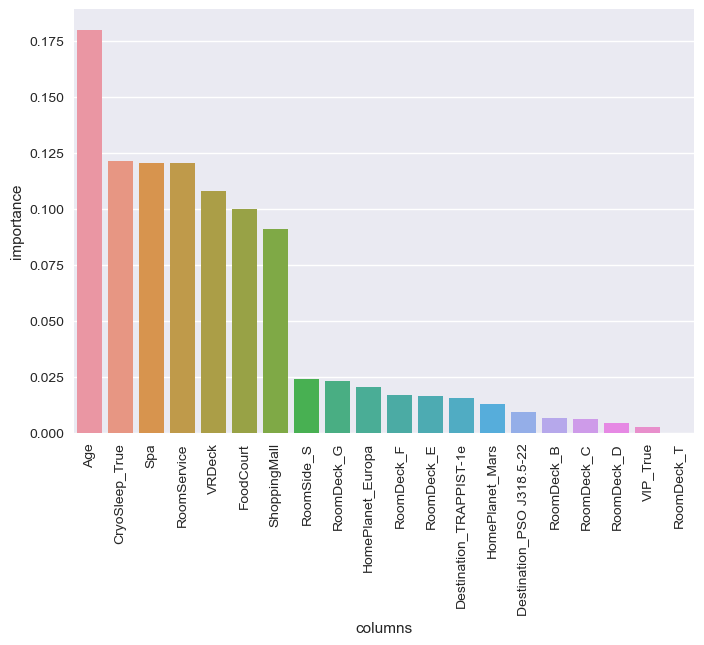

In [72]:
sns.barplot(x=rfc_feature_importance_df['columns'], y=rfc_feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

<h2>Gradient Boosting</h2>

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [75]:
gb_model = GradientBoostingClassifier()

In [76]:
grid_gb_model = GridSearchCV(gb_model,param_grid)

In [77]:
grid_gb_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [78]:
grid_gb_model.best_params_

{'max_depth': 5, 'n_estimators': 40}

In [79]:
predictions = grid_gb_model.predict(X_test)

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.83      0.79      0.81       972
        True       0.79      0.83      0.81       921

    accuracy                           0.81      1893
   macro avg       0.81      0.81      0.81      1893
weighted avg       0.81      0.81      0.81      1893



In [81]:
grid_gb_model.best_estimator_.feature_importances_

array([5.93866348e-02, 6.40890847e-02, 1.02998874e-01, 5.29743784e-02,
       1.07874710e-01, 9.70677844e-02, 1.20044650e-02, 4.68123095e-03,
       3.78035067e-01, 3.37421742e-03, 5.21569780e-03, 4.30971320e-04,
       1.66230516e-04, 4.91509369e-03, 1.11322371e-04, 2.36261441e-02,
       8.75365017e-04, 6.40961632e-02, 0.00000000e+00, 1.80765655e-02])

In [82]:
gb_feature_importance_df = pd.DataFrame({'columns':X_train.columns.values, 
                                         'importance': grid_gb_model.best_estimator_.feature_importances_})
gb_feature_importance_df = gb_feature_importance_df.sort_values('importance', ascending=False)
gb_feature_importance_df = gb_feature_importance_df.reset_index(drop=True)
gb_feature_importance_df

,columns,importance
0,CryoSleep_True,0.378035
1,Spa,0.107875
2,FoodCourt,0.102999
3,VRDeck,0.097068
4,RoomDeck_G,0.064096
5,RoomService,0.064089
6,Age,0.059387
7,ShoppingMall,0.052974
8,RoomDeck_E,0.023626
9,RoomSide_S,0.018077


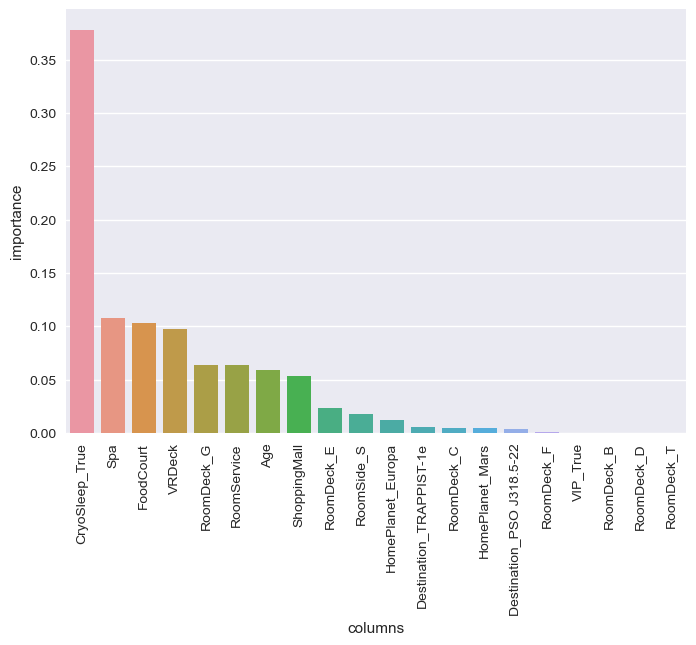

In [83]:
sns.barplot(x=gb_feature_importance_df['columns'], y=gb_feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

In [84]:
gb_accuracy_score = accuracy_score(y_test,predictions)
gb_precision_score = precision_score(y_test,predictions, average='macro')
gb_f1_score = f1_score(y_test,predictions, average='macro')

In [85]:
model_results = model_results.append({'Model': 'Gradient Boosting Classification', 'Accuracy':gb_accuracy_score,
                                      'Precision':gb_precision_score,
                                      'f1_score': gb_f1_score}, ignore_index=True)

<ipython-input-85-a9edd72d3011>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Gradient Boosting Classification', 'Accuracy':gb_accuracy_score,


<h2>XGBoost</h2>

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier(random_state = 42)

In [88]:
xgb_params = {
    "n_estimators": [20,50,100,200,500],
    "max_depth": [2,5,10,25,50],
    "subsample": [0.01,0.1,0.25,0.5,0.7],
    "learning_rate": [0.01,0.05,0.1,0.25,0.5]
}

In [89]:
grid_XGB_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs=-1, verbose=2)

In [90]:
grid_XGB_model.fit(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5],
                         'max_depth': [2, 5, 10, 25, 50],
                         'n_estimators': [20, 50, 100, 200, 500],
                         'subsample': [0.01, 0.1, 0.25, 0.5, 0.7]},
             verbose=2)

In [91]:
grid_XGB_model.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.5}

In [92]:
predictions = grid_XGB_model.predict(X_test)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.81      0.81      0.81       972
        True       0.80      0.80      0.80       921

    accuracy                           0.81      1893
   macro avg       0.81      0.81      0.81      1893
weighted avg       0.81      0.81      0.81      1893



In [94]:
xgb_feature_importance_df = pd.DataFrame({'columns':X_train.columns.values, 
                                         'importance': grid_XGB_model.best_estimator_.feature_importances_})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values('importance', ascending=False)
xgb_feature_importance_df = xgb_feature_importance_df.reset_index(drop=True)
xgb_feature_importance_df

,columns,importance
0,CryoSleep_True,0.390125
1,RoomDeck_G,0.087764
2,RoomDeck_E,0.050103
3,HomePlanet_Europa,0.048165
4,VRDeck,0.037652
5,Spa,0.037215
6,FoodCourt,0.035616
7,RoomService,0.033200
8,HomePlanet_Mars,0.032275
9,ShoppingMall,0.031931


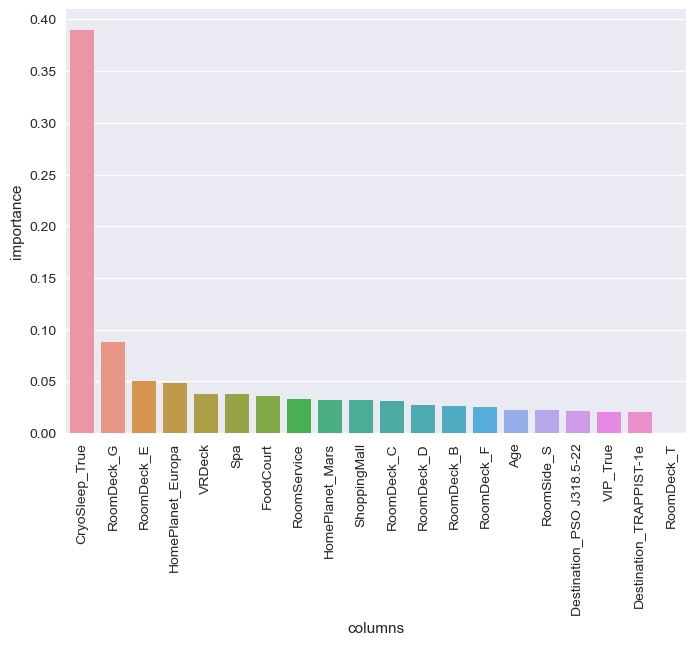

In [95]:
sns.barplot(x=xgb_feature_importance_df['columns'], y=xgb_feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

In [96]:
xgb_accuracy_score = accuracy_score(y_test,predictions)
xgb_precision_score = precision_score(y_test,predictions, average='macro')
xgb_f1_score = f1_score(y_test,predictions, average='macro')

In [97]:
model_results = model_results.append({'Model': 'Extreme Gradient Boosting', 'Accuracy':xgb_accuracy_score,
                                      'Precision':xgb_precision_score,
                                      'f1_score': xgb_f1_score}, ignore_index=True)

<ipython-input-97-c26009254c3b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Extreme Gradient Boosting', 'Accuracy':xgb_accuracy_score,


In [98]:
model_results

,Model,Accuracy,Precision,f1_score
0,Logistic Regression,0.793978,0.794253,0.793971
1,Random Forest Classification,0.810882,0.811028,0.810585
2,Gradient Boosting Classification,0.808241,0.808828,0.808241
3,Extreme Gradient Boosting,0.808241,0.808105,0.808096


<h2>Overall Results</h2>

In [99]:
model_results

,Model,Accuracy,Precision,f1_score
0,Logistic Regression,0.793978,0.794253,0.793971
1,Random Forest Classification,0.810882,0.811028,0.810585
2,Gradient Boosting Classification,0.808241,0.808828,0.808241
3,Extreme Gradient Boosting,0.808241,0.808105,0.808096


<p>Conclusion: Random Forest Classification is the best model because it has highest Accuracy, Precision and f1_score. The best hyperparameters for the RFC model is max_features = 6 and n_estimators = 100.</p>



# Webscraping

Scraping the first 5 pages of https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating


<h2>Webscraping imports</h2>

In [100]:
import requests
from bs4 import BeautifulSoup

<h2>Web Scraping</h2>

In [101]:
PAGES_TO_SCRAPE = 5

titles_list = []
years_list = []
runtimes_list = []
ratings_list = []
metascores_list = []
votes_list = []
gross_list = []

page = 0

for page in range(PAGES_TO_SCRAPE):
    scrape_start = str(page * 100 + 1)
    url = f'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={scrape_start}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    movie_divs = soup.find_all('div', class_='lister-item-content')

    for movie_div in movie_divs:

        try:
            title = movie_div.h3.a.text
        except:
            title = ""

        try:
            year = movie_div.h3.find_all('span', class_='lister-item-year')[0].text.strip("()")[-4:]
        except:
            year = ""

        try:
            runtime = movie_div.find_all('p', class_="text-muted")[0].find_all('span', class_="runtime")[0].text
        except:
            runtime = ""

        try:
            ratings = movie_div.find_all('div', class_="ratings-bar")[0].div.strong.text
        except:
            ratings = ""

        try:
            metascore = movie_div.find_all('div', class_="inline-block ratings-metascore")[0].span.text.strip(" ")
        except:
            metascore = ""

        try:
            votes = movie_div.find_all('p', class_="sort-num_votes-visible")[0].find_all("span")[1].text.replace(",", "")
        except:
            votes = ""

        try:
            gross = movie_div.find_all('p', class_="sort-num_votes-visible")[0].find_all("span")[4].text
        except:
            gross = ""
        if gross != "" and gross[0] != "$":
            gross = ""

        titles_list.append(title)
        years_list.append(year)
        runtimes_list.append(runtime)
        ratings_list.append(ratings)
        metascores_list.append(metascore)
        votes_list.append(votes)
        gross_list.append(gross)

data = {
    "Title": titles_list,
    "Year": years_list,
    "Runtime": runtimes_list,
    "Rating": ratings_list,
    "Metascore": metascores_list,
    "Votes": votes_list,
    "Gross": gross_list
}    
    
results = pd.DataFrame(data)

In [102]:
results

,Title,Year,Runtime,Rating,Metascore,Votes,Gross
0,The Shawshank Redemption,1994,142 min,9.3,82,2791424,$28.34M
1,The Godfather,1972,175 min,9.2,100,1944261,$134.97M
2,The Dark Knight,2008,152 min,9.0,84,2771597,$534.86M
3,Schindler's List,1993,195 min,9.0,95,1403829,$96.90M
4,The Godfather Part II,1974,202 min,9.0,90,1320887,$57.30M
...,...,...,...,...,...,...,...
495,The Wild Bunch,1969,145 min,7.9,98,88310,$12.06M
496,Mystic River,2003,138 min,7.9,84,472277,$90.14M
497,Doctor Zhivago,1965,197 min,7.9,69,80154,$111.72M
498,Shaun of the Dead,2004,99 min,7.9,76,577914,$13.54M


In [103]:
results.to_csv('imdb.csv', index=False)